# Zomatoo Dataset Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv('zomato.csv', encoding="ISO-8859-1")
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
# check features avaiable in my df
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
# let's check the info about df. As we can seee the df have no null value.
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [32]:
# let's describe our df Statistically. This will only show the Numeric Features available in the df.
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

## In Data Analysis we do some basic Data Engineering.

1. Findind Missing Values
2. Explore about Numerical Variables
3. Explore about Categorical Variables
4. Finding relationships between features
5. Finding Duplicate values(rows)

In [11]:
# let's find missing values in our df
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [30]:
# we will check how many features in df  have missing values
[features for features in df.columns if df[features].isnull().sum() > 0]

['Cuisines']

In [47]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [49]:
# Let's read another data
df_country_codes = pd.read_excel('Country-Code.xlsx')
df_country_codes

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [51]:
final_df = pd.merge(df,df_country_codes,on='Country Code',how='left')
final_df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  
1    Dark Green    Excellent   591  Phillipines  

[2 rows x 22 columns]

In [55]:
final_df[final_df['Country'] == 'UAE']

Restaurant ID                   Restaurant Name  Country Code       City  \
564       18212135                           Denny's           214  Abu Dhabi   
565        5704255            Famous Dave's Barbecue           214  Abu Dhabi   
566        5701978                    Pizza Di Rocco           214  Abu Dhabi   
567        5701729                    Sofra Istanbul           214  Abu Dhabi   
568        5704168                              Salt           214  Abu Dhabi   
569       18277098                     Genghis Grill           214  Abu Dhabi   
570        5701446                      Olive Garden           214  Abu Dhabi   
571        5700052  Cho Gao - Crowne Plaza Abu Dhabi           214  Abu Dhabi   
572        5702418                            Gazebo           214  Abu Dhabi   
573        5700386   Sangeetha Vegetarian Restaurant           214  Abu Dhabi   
574        5704202                       Hot Palayok           214  Abu Dhabi   
575        5701052                        Applebee's           214  Abu Dhabi   
576        5704118                     Tikka Tonight           214  Abu Dhabi   
577        5701548                   Bait El Khetyar           214  Abu Dhabi   
578       18235425                  Indian By Nature           214  Abu Dhabi   
579        5702615                         Via Delhi           214  Abu Dhabi   
580        5703500                      Punjab Grill           214  Abu Dhabi   
581       18253896                             Tamba           214  Abu Dhabi   
582        5701917                      P.F. Chang's           214  Abu Dhabi   
583        5702574            The Cheesecake Factory           214  Abu Dhabi   
584         202321                          The Farm           214      Dubai   
585         206488                     Maharaja Bhog           214      Dubai   
586         209654                        Rasoi Ghar           214      Dubai   
587       18340881                   Barbeque Nation           214      Dubai   
588       18233284                        Farzi Cafe           214      Dubai   
589       18269368           AB's Absolute Barbecues           214      Dubai   
590       18254160               Carnival By Tresind           214      Dubai   
591         208939           AB's Absolute Barbecues           214      Dubai   
592         201531                    Hard Rock Cafe           214      Dubai   
593         208965                   The Coffee Club           214      Dubai   
594         208778                              SALT           214      Dubai   
595         209703                      Din Tai Fung           214      Dubai   
596       18381837                         SpiceKlub           214      Dubai   
597         208850     Tresind - Nassima Royal Hotel           214      Dubai   
598         210134  Grand Barbeque Buffet Restaurant           214      Dubai   
599         201044                       Red Lobster           214      Dubai   
600         201340            The Cheesecake Factory           214      Dubai   
601       18289126                          Parker's           214      Dubai   
602         202507                        Applebee's           214      Dubai   
603         210139                        Grub Shack           214      Dubai   
604        5600424                             Kamat           214    Sharjah   
605        5602751                   Vadakkan Pepper           214    Sharjah   
606        5600457                            Gazebo           214    Sharjah   
607        5600642                  Katis Restaurant           214    Sharjah   
608       18268134                            Zaroob           214    Sharjah   
609       18376208                             Derby           214    Sharjah   
610        5600959                     Nayaab Haandi           214    Sharjah   
611        5600103          Najmat Lahore Restaurant           214    Sharjah   
612        5602586                  

In [56]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [60]:
# Finding the Number of Unique Records from One(1) Feature. And top (n) wise
final_df.Cuisines.value_counts().head(5)

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

In [62]:
final_df[final_df['Cuisines'] == 'North Indian']

Restaurant ID              Restaurant Name  Country Code        City  \
626         3400005      Time2Eat - Mama Chicken             1        Agra   
680         2400052                       Eat On             1   Allahabad   
686         2200078             Charming Chicken             1    Amritsar   
690         2200067  Bubby Fish & Chicken Corner             1    Amritsar   
699         2200132               Brothers Dhaba             1    Amritsar   
...             ...                          ...           ...         ...   
9148       18378803                 #Dilliwaala6             1  Puducherry   
9173       18441490               Barbeque Ville             1        Pune   
9227        3200002     Gazebo Garden Restaurant             1    Vadodara   
9241        3900250                 Baati Chokha             1    Varanasi   
9245        3900058     Chrystal Bowl Restaurant             1    Varanasi   

                                                Address          Locality  \
626         Main Market, Sadar Bazaar, Agra Cantt, Agra        Agra Cantt   
680   Palace Compound, Near Palace Cinema, MG Marg, ...       Civil Lines   
686   Shop 3, Opposite Nari Nikaten, Majithia Road, ...      Basant Nagar   
690   Near Crystal Chowk, Cooper Road, INA Colony, A...        INA Colony   
699   Golden Temple Out Road, Opposite Amritsar Muni...         Town Hall   
...                                                 ...               ...   
9148        6, Rue De La Marine, White Town, Puducherry        White Town   
9173  257, Green Valley, Near Mankar Chowk, Kaspate ...             Wakad   
9227  Opposite FGI, Near Iscon Harmony, Sevasi-Bhimp...         Panchvati   
9241  Anand Mandir Cinema, Telibagh, Dashaswmedh Roa...  Dashaswmedh Road   
9245          34-B, Ravindra Puri, Near Lanka, Varanasi             Lanka   

                Locality Verbose  Longitude   Latitude      Cuisines  ...  \
626             Agra Cantt, Agra  78.011608  27.160832  North Indian  ...   
680       Civil Lines, Allahabad  81.834236  25.450377  North Indian  ...   
686       Basant Nagar, Amritsar  74.884384  31.644532  North Indian  ...   
690         INA Colony, Amritsar  74.875828  31.635671  North Indian  ...   
699          Town Hall, Amritsar  74.877666  31.625981  North Indian  ...   
...                          ...        ...        ...           ...  ...   
9148      White Town, Puducherry  79.834810  11.936532  North Indian  ...   
9173                 Wakad, Pune  73.773572  18.592718  North Indian  ...   
9227         Panchvati, Vadodara   0.000000   0.000000  North Indian  ...   
9241  Dashaswmedh Road, Varanasi   0.000000   0.000000  North Indian  ...   
9245             Lanka, Varanasi  83.001801  25.290468  North Indian  ...   

      Has Table booking Has Online delivery Is delivering now  \
626                  No                  No                No   
680                  No                  No                No   
686                  No                  No                No   
690                  No                  No                No   
699                  No                  No                No   
...                 ...                 ...               ...   
9148                 No                  No                No   
9173                Yes                  No                No   
9227                 No                  No                No   
9241                 No                  No                No   
9245                 No                  No                No   

     Switch to order menu Price range Aggregate rating  Rating color  \
626                    No           2              3.6        Yellow   
680                    No           1              3.7        Yellow   
686                    No           1              3.9        Yellow   
690                    No           1              3.5        Yellow   
699                    No           2              3.8        Yellow   
...   

In [63]:
final_df[final_df['Cuisines'] == 'North Indian, Chinese']

Restaurant ID                  Restaurant Name  Country Code  \
668         2400193                           Dewsis             1   
669         2400027                  Friends Forever             1   
676         2400017               Tandoor Restaurant             1   
685         2200011   Makhan Fish and Chicken Corner             1   
694         2200283                Sakhis Watz Kukin             1   
...             ...                              ...           ...   
9174        2700001                         Hot Lips             1   
9181        2700002  Moti Mahal Delux Tandoori Trail             1   
9185        2700242                       Food Belle             1   
9194          96814                   Saffron Mantra             1   
9217        3200440                    Kabir Kitchen             1   

              City                                            Address  \
668      Allahabad  2, MG Marg, Opposite Hanuman Mandir, Civil Lin...   
669      Allahabad   13/13, Sardar Patel Marg, Civil Lines, Allahabad   
676      Allahabad  17/33, Mahatama Gandhi Marg, Civil Lines, Alla...   
685       Amritsar  21-A, Near Madaan Hospital, Majitha Road, Basa...   
694       Amritsar        M 47, Green Avenue, opp Main Park, Amritsar   
...            ...                                                ...   
9174        Ranchi  Near Chandini Chowk, Kanke Road, Gandhi Nagar,...   
9181        Ranchi  Lower Ground Floor Karni Heights, Beside Milan...   
9185        Ranchi  Bhaskar Anirudh Complex, Near Jail More, Karam...   
9194  Secunderabad      The Purple Leaf Hotel, Karkhana, Secunderabad   
9217      Vadodara  R.C. Dutt Road,Opposite Concord Building, Alka...   

           Locality         Locality Verbose  Longitude   Latitude  \
668     Civil Lines   Civil Lines, Allahabad   0.000000   0.000000   
669     Civil Lines   Civil Lines, Allahabad  81.835585  25.457687   
676     Civil Lines   Civil Lines, Allahabad  81.860187  25.443994   
685    Basant Nagar   Basant Nagar, Amritsar  74.884359  31.643620   
694   Ranjit Avenue  Ranjit Avenue, Amritsar  74.864910  31.646689   
...             ...                      ...        ...        ...   
9174   Gandhi Nagar     Gandhi Nagar, Ranchi  85.316842  23.416792   
9181          Kadru            Kadru, Ranchi  85.326967  23.353783   
9185         Lalpur           Lalpur, Ranchi   0.000000   0.000000   
9194       Karkhana   Karkhana, Secunderabad  78.500366  17.458998   
9217       Alkapuri       Alkapuri, Vadodara   0.000000   0.000000   

                   Cuisines  ...  Has Table booking Has Online delivery  \
668   North Indian, Chinese  ...                 No                  No   
669   North Indian, Chinese  ...                 No                  No   
676   North Indian, Chinese  ...                 No                  No   
685   North Indian, Chinese  ...                 No                  No   
694   North Indian, Chinese  ...                 No                  No   
...                     ...  ...                ...                 ...   
9174  North Indian, Chinese  ...                 No                  No   
9181  North Indian, Chinese  ...                 No                  No   
9185  North Indian, Chinese  ...                 No                  No   
9194  North Indian, Chinese  ...                Yes                 Yes   
9217  North Indian, Chinese  ...                 No                  No   

     Is delivering now Switch to order menu Price range Aggregate rating  \
668                 No                   No           3              3.4   
669                 No                   No           3              3.4   
676                 No                   No           3              3.2   
685                 No                   No           2              3.4   
694                 No                   No           2              3.6   
...                ...                  ...         ...              ...   
9174          

In [71]:
country_name = final_df.Country.value_counts().index

In [77]:
country_val = final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

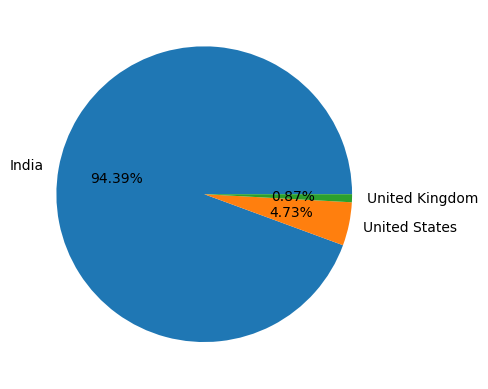

In [76]:
# top 3 countries where company is operating
plt.pie(country_val[:3],labels=country_name[:3], autopct='%1.2f%%');

In [ ]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

### Observations regarding the ratings dataset

1. when ratings are between 4.5 to 4.9 ----> Excellent
2. when ratings are between 4.0 to 4.4 ----> Very Good
3. when ratings are between 3.5 to 3.9 ----> Good
4. when ratings are between 2.5 to 3.4 ----> Average
5. when ratings are between 1.8 to 2.4 ----> Poor
6. when ratings is 0.0 ----> Not Rated

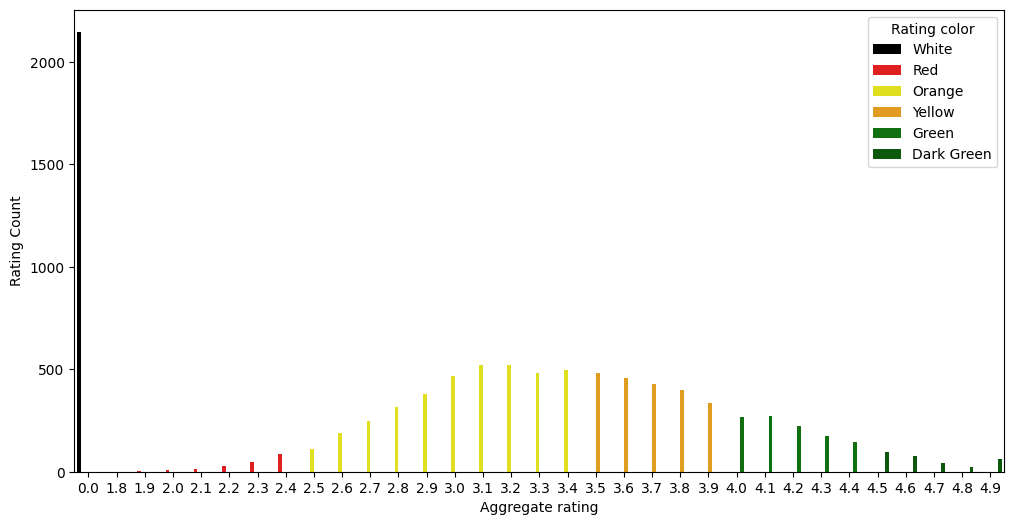

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating", y="Rating Count", hue='Rating color',data=ratings,palette=['black','red','yellow','orange','green','darkgreen']);

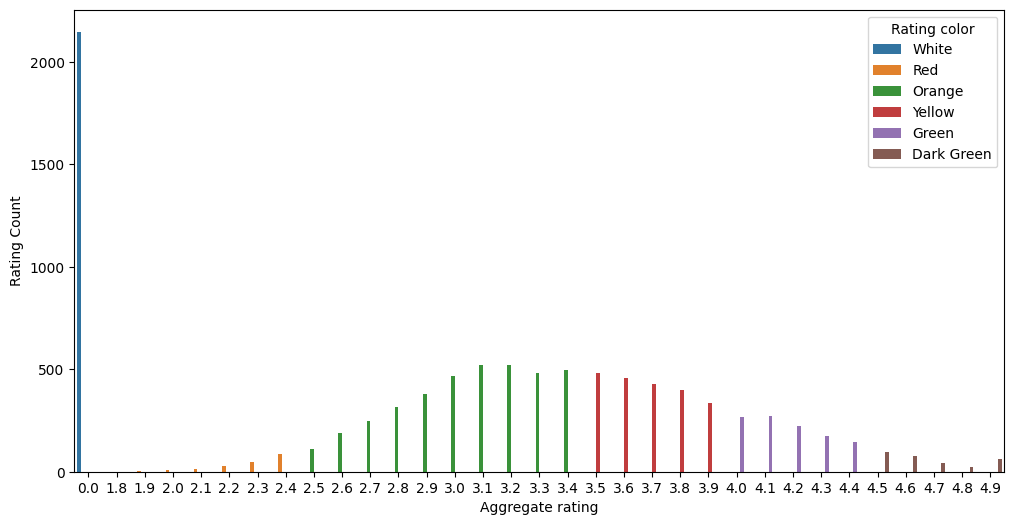

In [111]:
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating", y="Rating Count", hue='Rating color',data=ratings);

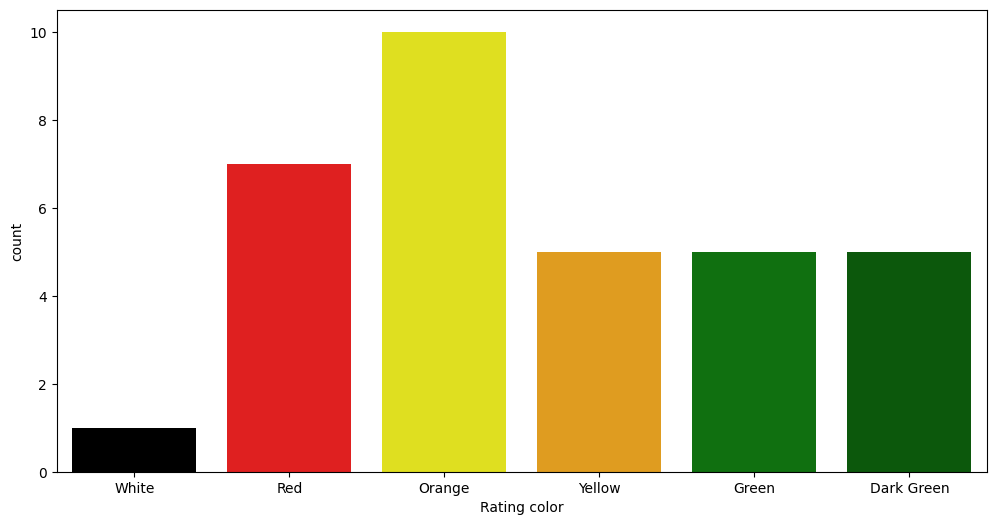

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(x="Rating color",data=ratings,palette=['black','red','yellow','orange','green','darkgreen']);

In [142]:
# Pivoted into final_df
tmp_df = final_df[['Aggregate rating', 'Country']]
pivot_table = tmp_df.pivot_table(
    index=['Country'],
    values=['Aggregate rating'],
    aggfunc={'Aggregate rating': ['min']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
final_df_pivot = pivot_table.reset_index()

# Sorted Aggregate rating min in ascending order
final_df_pivot = final_df_pivot.sort_values(by='Aggregate rating min', ascending=True, na_position='first')

# Filtered Aggregate rating min
final_df_pivot = final_df_pivot[final_df_pivot['Aggregate rating min'].isin(final_df_pivot['Aggregate rating min'].nsmallest(5, keep='all'))]
final_df_pivot

Country  Aggregate rating min
1           Brazil                   0.0
3            India                   0.0
13  United Kingdom                   0.0
14   United States                   0.0
5      New Zealand                   2.3

In [154]:
# Finding the Countries that has 0 ratings
final_df.groupby('Country')['Aggregate rating'].min()

Country
Australia         2.4
Brazil            0.0
Canada            3.0
India             0.0
Indonesia         3.4
New Zealand       2.3
Phillipines       3.6
Qatar             3.4
Singapore         3.0
South Africa      3.4
Sri Lanka         2.4
Turkey            3.4
UAE               2.4
United Kingdom    0.0
United States     0.0
Name: Aggregate rating, dtype: float64

In [159]:
# His method

final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index().head(5)

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

In [157]:
final_df[final_df['Aggregate rating']==0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [161]:
# find out which cureny is used by which country
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [170]:
final_df.groupby('Country')['Currency'].unique()

Country
Australia                      [Dollar($)]
Brazil                [Brazilian Real(R$)]
Canada                         [Dollar($)]
India                 [Indian Rupees(Rs.)]
Indonesia         [Indonesian Rupiah(IDR)]
New Zealand                [NewZealand($)]
Phillipines             [Botswana Pula(P)]
Qatar                    [Qatari Rial(QR)]
Singapore                      [Dollar($)]
South Africa                     [Rand(R)]
Sri Lanka          [Sri Lankan Rupee(LKR)]
Turkey                  [Turkish Lira(TL)]
UAE                   [Emirati Diram(AED)]
United Kingdom                [Pounds(£)]
United States                  [Dollar($)]
Name: Currency, dtype: object

In [173]:
# whihc countries do have online deliveries
final_df.head(3)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  

[3 rows x 22 columns]

In [186]:
final_df.groupby('Country')['Has Online delivery'].unique()

Country
Australia              [No]
Brazil                 [No]
Canada                 [No]
India             [No, Yes]
Indonesia              [No]
New Zealand            [No]
Phillipines            [No]
Qatar                  [No]
Singapore              [No]
South Africa           [No]
Sri Lanka              [No]
Turkey                 [No]
UAE               [No, Yes]
United Kingdom         [No]
United States          [No]
Name: Has Online delivery, dtype: object

### top 5 cities where company has online delivery options

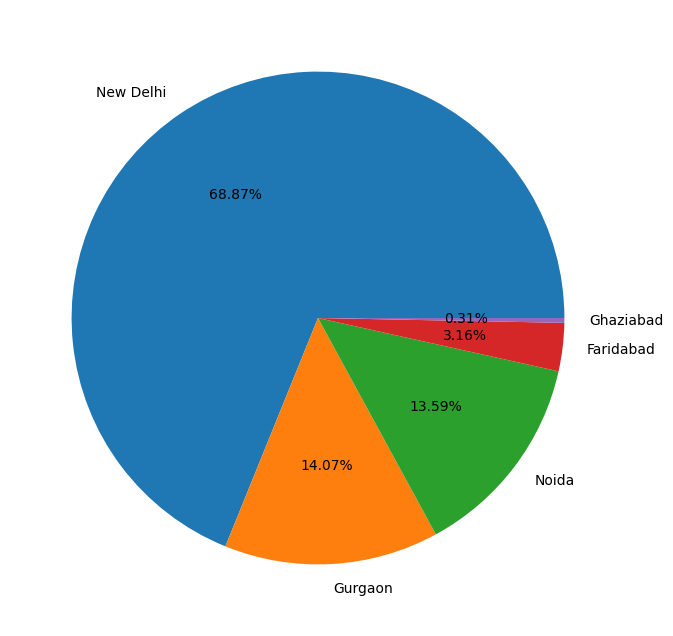

In [191]:
plt.figure(figsize=(10,8))
city_value = final_df.City.value_counts().values
city_index = final_df.City.value_counts().index
# top 5 cities where company has oonline delivery options
plt.pie(city_value[:5],labels=city_index[:5], autopct='%1.2f%%');

### Find Top 10 Cuisines

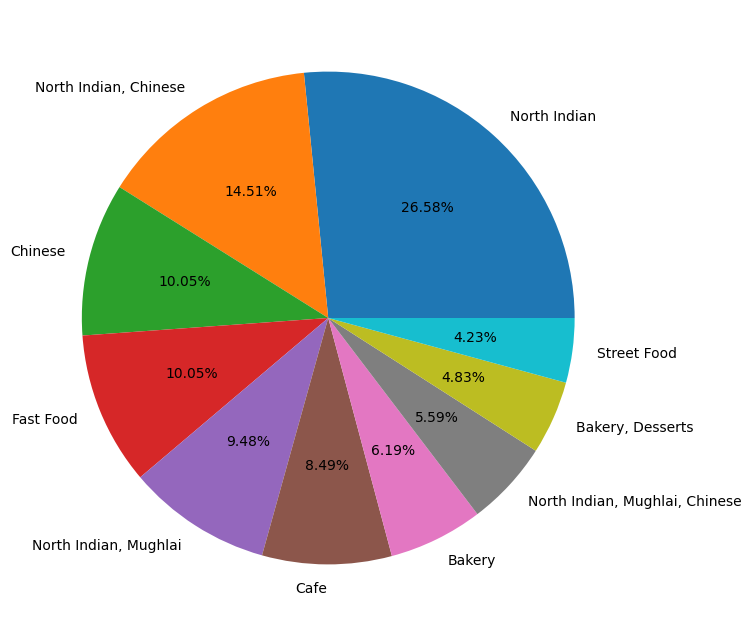

In [190]:
plt.figure(figsize=(10,8))
Cuisines_value = final_df.Cuisines.value_counts().values
Cuisines_index = final_df.Cuisines.value_counts().index
# top 10 Cuisines
plt.pie(Cuisines_value[:10],labels=Cuisines_index[:10], autopct='%1.2f%%');